<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 8**

## **Contenido**

- <a href="#pan"> Pandas</a><br>
  - <a href="#ser"> Series</a><br>
  - <a href="#dat"> Dataframes</a><br>
  - <a href="#car"> Cargando conjuntos de datos</a><br>
  - <a href="#ind"> Indexación, selección y asignación</a><br>


  









<p><a name="pan"></a></p>

# **Pandas**

Pandas es una de las librerías de Python más populares en ciencia de datos. Proporciona estructuras de datos de alto nivel y funciones que están diseñadas para que el trabajo con datos estructurados o tabulares sea rápido y fácil. En particular, Pandas proporciona funcionalidades que facilitan la indexación, segmentación, el uso de agregaciones y mucho más. Dado que la manipulación y limpieza de datos son habilidades importantes en la ciencia de datos, esta será una herramienta imprescindible.

Pandas está construida sobre NumPy, por lo que podemos usar los métodos y funcionalidades de los arreglos de numpy que estudiamos en las sesiones anteriores. Además, los objetos de pandas van a ser las estructuras de datos con las cuales vamos a alimentar los algoritmos de Machine Learning, por lo que va a ser fundamental tener un buen conocimiento de estos objetos.



In [ ]:
import pandas as pd

<p><a name="ser"></a></p>

# **Series**

Una serie de pandas es un arreglo unidimensional de datos indexados

<p><img alt="Colaboratory logo" height="160px" src="https://i.imgur.com/5e9omly.png" align="left" hspace="10px" vspace="0px"></p>

Podemos construir una serie a partir de una lista o arreglo mediante el constructor `Series`

In [ ]:
data = [1,4,23,5]

s = pd.Series(data)
s

0     1
1     4
2    23
3     5
dtype: int64

Como vemos en la salida anterior, la serie contiene una secuencia de valores y una secuencia de índices, a los que podemos acceder con los atributos `values` e `index` respectivamente. 

In [ ]:
# valores de la serie
s.values

array([ 1,  4, 23,  5])

In [ ]:
# indices de la serie
s.index

RangeIndex(start=0, stop=4, step=1)

`values` es un arreglo de numpy, mientras que `index` es un tipo de objeto por sí mismo, muy similar a un arreglo de numpy con la diferencia que este es inmutable. Note que los índices pueden ser definidos posteriormente mediante el atributo `index`



In [ ]:
ids = [4,3,5,4]

s.index = ids
s

4     1
3     4
5    23
4     5
dtype: int64

Note que el índice no tiene ningún tipo de restricción respecto a sus valores o su tipo.

Adicionalmente vemos que a la serie se asocia un tipo de dato particular, al cual podemos acceder mediante el atributo `dtype`

In [ ]:
# tipo de dato en la serie
s.dtype

dtype('int64')

Tanto el tipo de dato como los índices pueden ser definidos a la hora de la construcción de la serie. También podemos definir un nombre particular para la serie:

In [ ]:
s = pd.Series(data, index=ids, dtype="float64", name="serie")
s

4     1.0
3     4.0
5    23.0
4     5.0
Name: serie, dtype: float64

Veamos algunos de los métodos de este objeto

* `sort_values`/`sort_index`: Con estos podemos ordenar los valores/índices de la serie

In [ ]:
# ordenar los valores de la serie
s.sort_values()

4     1.0
3     4.0
4     5.0
5    23.0
Name: serie, dtype: float64

In [ ]:
# # ordenar los indices de la serie
s.sort_index()

3     4.0
4     1.0
4     5.0
5    23.0
Name: serie, dtype: float64

Note que el cambio no toma lugar, por lo que hay que reasignar la variable o utilizar el argumento por palabra clave `inplace` para que el cambio tome lugar

In [ ]:
s.sort_values(inplace=True)
s

4     1.0
3     4.0
4     5.0
5    23.0
Name: serie, dtype: float64

Podemos ordenar los valores de forma descendente utilizando el argumento por palabra clave `ascending`

In [ ]:
s.sort_values(ascending=False)

5    23.0
4     5.0
3     4.0
4     1.0
Name: serie, dtype: float64

* `reset_index`: Con este método podemos reinicializar el indice 

In [ ]:
s.reset_index()

,index,serie
0,4,1.0
1,3,4.0
2,4,5.0
3,5,23.0


Note que el índice pasa a ser otra columna de la estructura de datos. Para evitar este comportamiento utilizamos el arg `drop`:

In [ ]:
s.reset_index(drop=True, inplace=True)

In [ ]:
s

0     1.0
1     4.0
2     5.0
3    23.0
Name: serie, dtype: float64

* `rename`: Con este podemos renombrar un índice de forma individual utilizando mediante un mapeo

In [ ]:
# utilizando un diccionario como mapeo
s.rename({1:"id1"}, inplace=True)
s

0       1.0
id1     4.0
2       5.0
3      23.0
Name: serie, dtype: float64

In [ ]:
s.reset_index(drop=True, inplace=True)
s

0     1.0
1     4.0
2     5.0
3    23.0
Name: serie, dtype: float64

In [ ]:
# utilizando una funcion como mapeo
s.rename(lambda id: 2*id, inplace=True)
s

0     1.0
2     4.0
4     5.0
6    23.0
Name: serie, dtype: float64

* `replace`: Con este podemos modificar valores particulares 

In [ ]:
# reemplazando un unico valor
s.replace(1, 100, inplace=True)
s

0    100.0
2      4.0
4      5.0
6     23.0
Name: serie, dtype: float64

In [ ]:
# reemplazando multiples valores
s.replace({4:400, 100:1})

0      1.0
2    400.0
4      5.0
6     23.0
Name: serie, dtype: float64

* `drop`: Con este podemos eliminar un elemento 

In [ ]:
# eliminando la primera fila
s.drop(0, inplace=True)
s

2     4.0
4     5.0
6    23.0
Name: serie, dtype: float64

Podemos pensar en una Serie de Pandas un poco como una especialización de un diccionario de Python: Un diccionario es una estructura que asigna claves (`keys`) a un conjunto de valores (`values`), y una serie es una estructura que asigna claves de cierto tipo (`index`) a un conjunto de valores de cierto tipo (`values`). Podemos aclarar aún más la analogía de la serie como diccionario construyendo un objeto de la serie directamente desde un diccionario de Python:


In [ ]:
d_poblacion = {"BRA":21014, "COL": 50372424, "ARG":44938712}

s_poblacion = pd.Series(d_poblacion, name="poblacion")
s_poblacion

BRA       21014
COL    50372424
ARG    44938712
Name: poblacion, dtype: int64

podemos seleccionar datos de la serie como si fuera un diccionario

In [ ]:
s_poblacion["COL"]

50372424

Sin embargo, a diferencia de los diccionarios, la serie permite realizar operaciones como segmentación, que no es posible en un diccionario común

In [ ]:
s_poblacion["BRA":"COL"]

BRA       21014
COL    50372424
Name: poblacion, dtype: int64

Así como el código compilado específico del tipo detrás de un arreglo de NumPy lo hace más eficiente que una lista de Python para ciertas operaciones, la información de tipo de una Serie Pandas lo hace mucho más eficiente que los diccionarios de Python para ciertas operaciones. 

<p><a name="dat"></a></p>

# **Dataframe**

La siguiente estructura fundamental en Pandas es el *Dataframe*. Si una serie es un análogo de un arreglo unidimensional con índices flexibles, un *DataFrame* es un análogo de un arreglo bidimensional con índices de fila flexibles y nombres de columna flexibles.


<p><img alt="Colaboratory logo" height="190px" src="https://i.imgur.com/60LlMlY.png" align="left" hspace="10px" vspace="0px"></p>

Del mismo modo que podríamos pensar en un arreglo bidimensional como una secuencia ordenada de columnas unidimensionales alineadas, podemos pensar en un DataFrame como una secuencia de Series alineadas. Aquí, por "alineado" queremos decir que comparten el mismo índice.


Podemos construir un dataframe el constructor `DataFrame`

In [ ]:
import numpy as np

# a partir de un arreglo
data = np.random.rand(3,3)

df = pd.DataFrame(data)
df

,0,1,2
0,0.227715,0.054873,0.003416
1,0.309302,0.668905,0.576062
2,0.311329,0.429783,0.290019


En este caso obtenemos un objeto tipo index tanto para las filas como para las columnas

In [ ]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
df.columns

RangeIndex(start=0, stop=3, step=1)

al igual que vimos con las series, podemos cambiar tanto las filas como las columnas al momento de la construcción del objeto, o posteriormente mediante la modificicación de los atributos `index` y `columns` del objeto:

In [ ]:
columns = [f"col{i}" for i in range(1,4)]
index = [f"id{i}" for i in range(3)]

df = pd.DataFrame(data, columns=columns, index=index)
df

,col1,col2,col3
id0,0.227715,0.054873,0.003416
id1,0.309302,0.668905,0.576062
id2,0.311329,0.429783,0.290019


In [ ]:
df = pd.DataFrame(data)

df.index = index
df.columns = columns
df

,col1,col2,col3
id0,0.227715,0.054873,0.003416
id1,0.309302,0.668905,0.576062
id2,0.311329,0.429783,0.290019


Podemos acceder al arreglo subyacente del dataframe mediante el atributo `values`

In [ ]:
df.values

array([[0.22771548, 0.05487286, 0.00341619],
       [0.30930159, 0.66890466, 0.57606226],
       [0.3113286 , 0.42978274, 0.29001892]])

De forma análoga a las series, podemos resetear el índice. Note que al igual que en el caso de la serie, el cambio no toma lugar sino que simplemente es una vista de la operación

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,col1,col2,col3
0,0.227715,0.054873,0.003416
1,0.309302,0.668905,0.576062
2,0.311329,0.429783,0.290019


Podemos modificar un índice de fila o columna individualmente mediante el método `rename`

In [ ]:
df.rename(columns={"col1":"Columna 1"}, index={0:"id0"}, inplace=True)

In [ ]:
df

,Columna 1,col2,col3
id0,0.227715,0.054873,0.003416
1,0.309302,0.668905,0.576062
2,0.311329,0.429783,0.290019


o eliminar una fila o columna con el método `drop`

In [ ]:
# eliminar fila
df.drop(index="id0")

,Columna 1,col2,col3
1,0.309302,0.668905,0.576062
2,0.311329,0.429783,0.290019


In [ ]:
# eliminar columna
df.drop(columns="col2")

,Columna 1,col3
id0,0.227715,0.003416
1,0.309302,0.576062
2,0.311329,0.290019


Veamos otras formas alternativas de construir un dataframe:

In [ ]:
# a partir de una serie
df = pd.DataFrame(s_poblacion)
df

,poblacion
BRA,21014
COL,50372424
ARG,44938712


In [ ]:
# a partir de un diccionario
dic = {"Nombre":["Camilo", "Mateo"], 
       "Apellido":["Pareja", "Galeano"], 
       "Edad":[23, 24]}

df = pd.DataFrame(dic)
df

,Nombre,Apellido,Edad
0,Camilo,Pareja,23
1,Mateo,Galeano,24


In [ ]:
# a partir de un diccionario de series
d_poblacion = {"BRA":210147125, "COL": 50372424, "ARG":44938712}
d_area = {"BRA":8514877, "COL":1141748, "ARG": 2792600}

s_area = pd.Series(d_area)
s_poblacion = pd.Series(d_poblacion)

df = pd.DataFrame({"Poblacion":s_poblacion, "Area":s_area})
df

,Poblacion,Area
BRA,210147125,8514877
COL,50372424,1141748
ARG,44938712,2792600


In [ ]:
# a partir de multiples series
s_area = pd.Series(d_area, name="area")
s_poblacion = pd.Series(d_poblacion, name="poblacion")

df = pd.DataFrame([s_poblacion, s_area])
df

,BRA,COL,ARG
poblacion,210147125,50372424,44938712
area,8514877,1141748,2792600


<p><a name="car"></a></p>

# **Cargando conjuntos de datos**

En las secciones anteriores estudiamos los objetos fundamentales de Pandas: series y dataframes. Vimos cómo crear estos objetos a partir de diferentes estructuras de datos generados por nosotros mismos. Sin embargo, la mayoría de las veces, no utilizaremos nuestros propios datos sino que trabajaremos con datos que ya existen.

Veamos cómo cargar un conjunto de datos en un DataFrame de Pandas. La función que debemos utilizar para esta tarea dependerá del formato en el que se ha generado el conjunto de datos. El formato más común es el CSV, para el cual pandas nos proporciona la funcion `read_csv`:  [repositorio del curso ](https://github.com/diplomadomludea/nivel_1)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/diplomadomludea/nivel_1/master/data/adult.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K


Veamos otros atributos del dataframe

In [ ]:
# forma del arreglo subyacente
df.shape

(48842, 15)

In [ ]:
# tipos de datos en el dataframe
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

Para una mejor visualización del DataFrame podemos utilizar el método `head`, que por defecto nos muestra únicamente las primeras cinco filas del dataframe:

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


usamos `tail` para ver las últimas filas:

In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K
48841,1,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,United-States,>50K


O el método `sample` para visualizar registros de forma aleatoria:

In [ ]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
12649,1,Private,174789,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K
47474,1,Self-emp-not-inc,183523,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,1,United-States,<=50K
28140,2,Private,73023,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,3,United-States,<=50K
35500,2,Private,30690,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,0,United-States,<=50K
45597,2,Private,268598,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,Other,Male,0,0,2,United-States,<=50K


### **Funciones de resumen**

Pandas nos proporciona varios métodos para obtener información reestructurada de los datos en una forma útil.

El método `info` nos muestra un resumen conciso de nuestro conjunto de datos:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capitalgain     48842 non-null  int64 
 11  capitalloss     48842 non-null  int64 
 12  hoursperweek    48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


El metodo `describe` genera un resumen estadistico de las columnas. Este dependerá del tipo de dato que se almacene en la columna. Por defecto, se realiza sobre los tipos de datos numericos.

In [ ]:
df.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,1.771078,1.896641e+05,10.078089,0.200319,0.114942,1.950698
std,1.295378,1.056040e+05,2.570973,0.746182,0.556924,0.897038
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.175505e+05,9.000000,0.000000,0.000000,2.000000
50%,2.000000,1.781445e+05,10.000000,0.000000,0.000000,2.000000
75%,3.000000,2.376420e+05,12.000000,0.000000,0.000000,2.000000
max,4.000000,1.490400e+06,16.000000,4.000000,4.000000,4.000000


Para obtener el resumen estadístico de un tipo de dato particular podemos utilizar el kwarg `include`:

In [ ]:
df.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


Podemos ver cada columna independientemente:

In [ ]:
df.age.describe()

count    48842.000000
mean         1.771078
std          1.295378
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: age, dtype: float64

Podemos ver los elementos únicos de una serie y su número con el metodo `uniuque` y `nunique`, respectivamente:

In [ ]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df.workclass.nunique()

8

Podemos usar el metodo `value_counts` para obtener una serie con la frecuencia con la que aparecen estos valores unicos de forma descendente

In [ ]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Podemos verla en orden ascendente utilizando el kwarg `ascending`

In [ ]:
df.workclass.value_counts(ascending=True)

Never-worked           10
Without-pay            21
Federal-gov          1432
Self-emp-inc         1695
State-gov            1981
Local-gov            3136
Self-emp-not-inc     3862
Private             33906
Name: workclass, dtype: int64

y podemos ver esta información gráficamente utilizando el método `plot` e indicando qué tipo de gráfico queremos tener con el kwarg `kind`

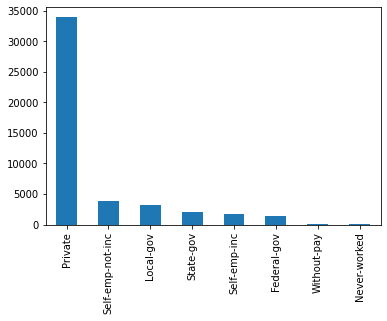

In [ ]:
df.workclass.value_counts().plot(kind="bar");

<p><a name="ind"></a></p>

# **Indexación, selección y asignación**

En sesiones anteriores estudiamos los métodos y funcionalidades para acceder, asignar y modificar valores de un arreglo de NumPy. Estos incluian indexación, segmentación, enmascaramiento, indexación sofisticada y combinaciones de estas.

Veamos ahora los elementos necesarios para indexar, seleccionar y modificar valores en las Series y DataFrames de Pandas.

### **Series**



In [ ]:
s = df.age[:4].copy()
s.index = ["a","b","c","d"]

s

a    2
b    3
c    2
d    3
Name: age, dtype: int64

como ya hemos visto, la serie se puede pensar como una especialización de un diccionario de python. Por especialización nos referimos a que en la serie, a diferencia del diccionario de python, podemos realizar operaciones de indexación como si esta fueran un arreglo. Por ejemplo, para la selección:



In [ ]:
# estilo diccionario
s["a"]

2

In [ ]:
# estilo atributo
s.a

2

In [ ]:
# estilo arreglo
s[0]

2

de esta forma podemos modificar un elemento de la serie o asignar nuevos elementos:

In [ ]:
s["a"] = 200
s.e = 200
s

a    200
b      3
c      2
d      3
e    200
Name: age, dtype: int64

Y al ser una especialización de un diccionario, podemos realizar operaciones de segmentación: 

In [ ]:
s["a":"c"]

a    200
b      3
c      2
Name: age, dtype: int64

In [ ]:
s[0:2]

a    200
b      3
Name: age, dtype: int64

Note que cuando se segmenta con un índice explícito, el índice final se incluye en la segmentación, mientras que cuando se segmenta con un índice implícito, el índice final se excluye de la segmentación!

Estas convenciones de indexación y segmentación puedan ser una fuente de confusión cuando los valores del índice son numéricos. Para ver esto de forma clara cambiemos los valores del índice de nuestra serie:



In [ ]:
s.index = np.arange(1,10,2)
s

1    200
3      3
5      2
7      3
9    200
Name: age, dtype: int64

una operación de indexación usará los índices explicitos:

In [ ]:
s[1]

200

mientras que una operación de segmentación usará los índices implicitos:

In [ ]:
s[1:3]

3    3
5    2
Name: age, dtype: int64

En el caso de la indexación sofisticada vamos a poder utilizar tanto indices explícitos como implícitos

In [ ]:
s = df.age[:4]
s.index = ["a","b","c","d"]
s

a    2
b    3
c    2
d    3
Name: age, dtype: int64

In [ ]:
s[["b","d"]]

b    3
d    3
Name: age, dtype: int64

In [ ]:
s[[1,3]]

b    3
d    3
Name: age, dtype: int64

El enmascaramiento funciona de forma similar a como la vimos en los arreglos de NumPy:

In [ ]:
s > 2

a    False
b     True
c    False
d     True
Name: age, dtype: bool

In [ ]:
s[s > 2]

b    3
d    3
Name: age, dtype: int64

In [ ]:
s[(s > 2) & (s < 5)]

b    3
d    3
Name: age, dtype: int64

**Indexadores `loc` y `iloc`**

Debido a las posibles confusiones en el caso de los índices enteros para la selección, Pandas proporciona unas funcionalidades especiales para la indexación que exponen explícitamente ciertos esquemas de indexación. Estos no son métodos funcionales, sino atributos que exponen una interfaz de segmentación particular para los datos de la Serie.



* El atributo o indexador `loc` permite indexar y segmentar haciendo siempre referencia al índice explícito:

In [ ]:
s.index = np.arange(1,8,2)
s

1    2
3    3
5    2
7    3
Name: age, dtype: int64

In [ ]:
s.loc[1]

2

In [ ]:
s.loc[1:3]

1    2
3    3
Name: age, dtype: int64

* El atributo `iloc` permite permite indexar y segmentar haciendo siempre referencia al índice implícito:


In [ ]:
s

1    2
3    3
5    2
7    3
Name: age, dtype: int64

In [ ]:
s.iloc[1]

3

In [ ]:
s.iloc[1:3]

3    3
5    2
Name: age, dtype: int64

Note que en el caso de `iloc`, el indice final, como pasa con los arreglos de NumPy, no se incluye en la selección. Mientras que con `loc`, el indice final sí se incluye en la selección.

Esta naturaleza explícita que nos proporcionan los indexadores `loc` y `iloc` los hacen muy útiles para mantener un código limpio y legible. Especialmente en el caso donde se tengan índices enteros, se recomienda usar estos indexadores para hacer que el código sea más fácil de leer y comprender, y para evitar errores sutiles debido a la convención mixta de indexación/segmentación.


## **Dataframe**

La sintaxis de estilo diccionario también se puede usar para seleccionar una columna en el DataFrame:






In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [ ]:
# estilo diccionario
df["education"]

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
           ...    
48837    Bachelors
48838      HS-grad
48839    Bachelors
48840    Bachelors
48841    Bachelors
Name: education, Length: 48842, dtype: object

In [ ]:
# estilo atributo
df.education

0        Bachelors
1        Bachelors
2          HS-grad
3             11th
4        Bachelors
           ...    
48837    Bachelors
48838      HS-grad
48839    Bachelors
48840    Bachelors
48841    Bachelors
Name: education, Length: 48842, dtype: object

también podemos usar esta sintáxis para modificar un valor o asignar una nueva columna. Por ejemplo, podemos asignar un valor constante a una columna: 

In [ ]:
df["new_col"] = "value"
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,new_col
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,value
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,value
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,value
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,value
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K,value


o asignar un arreglo/lista

In [ ]:
df["new_col"] = np.arange(df.shape[0])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,new_col
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,1
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,2
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,3
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K,4


Recordemos que podemos examinar el arreglo de datos subyacente utilizando el atributo values:

In [ ]:
df.values

array([[2, 'State-gov', 77516, ..., 'United-States', '<=50K', 0],
       [3, 'Self-emp-not-inc', 83311, ..., 'United-States', '<=50K', 1],
       [2, 'Private', 215646, ..., 'United-States', '<=50K', 2],
       ...,
       [2, 'Private', 374983, ..., 'United-States', '<=50K', 48839],
       [2, 'Private', 83891, ..., 'United-States', '<=50K', 48840],
       [1, 'Self-emp-inc', 182148, ..., 'United-States', '>50K', 48841]],
      dtype=object)

Como se mencionó anteriormente, también podemos ver el DataFrame como un arreglo bidimensional generalizado. Sin embargo, cuando se trata de indexar dataframes, la indexación de columnas con el estilo de diccionario nos impide tratarlo como un arreglo de NumPy. 

Veamoslo, si pasamos un indice a un arreglo, seleccionaremos una fila:


In [ ]:
df.values[0]

array([2, 'State-gov', 77516, 'Bachelors', 13, 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', 1, 0, 2,
       'United-States', '<=50K', 0], dtype=object)

mientras que al pasar un solo "índice" a un DataFrame estamos seleccionando una columna:


In [ ]:
df["age"]

0        2
1        3
2        2
3        3
4        1
        ..
48837    2
48838    4
48839    2
48840    2
48841    1
Name: age, Length: 48842, dtype: int64

Por lo tanto, si queremos indexar el DataFrame con un estilo de arreglo, necesitamos otra convención. Aquí de nuevo Pandas nos proporciona los indexadores `loc` y `iloc`.

Usando el indexador `iloc`, vamos a poder indexar el arreglo subyacente como si fuera un arreglo de NumPy, manteniendo el indice y las columnas del dataframe.




In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,new_col
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,1
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,2
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,3
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K,4


en este caso, si pasamos un indice, seleccionaremos una fila

In [ ]:
df.iloc[0]

age                           2
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capitalgain                   1
capitalloss                   0
hoursperweek                  2
native-country    United-States
class                     <=50K
new_col                       0
Name: 0, dtype: object

para seleccionar una columna con `iloc`:

In [ ]:
df.iloc[:, 0]

0        2
1        3
2        2
3        3
4        1
        ..
48837    2
48838    4
48839    2
48840    2
48841    1
Name: age, Length: 48842, dtype: int64

segmentacion:

In [ ]:
df.iloc[:3,:2]

,age,workclass
0,2,State-gov
1,3,Self-emp-not-inc
2,2,Private


indexacion sofisticada:

In [ ]:
# seleccionar las filas 1, 3 y 5
df.iloc[[1,3,5]]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,new_col
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,1
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,3
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States,<=50K,5


In [ ]:
# seleccionar las primeras tres filas 
# y las columnas 1, 3 y 5
df.iloc[:3, [1,3,5]]

,workclass,education,marital-status
0,State-gov,Bachelors,Never-married
1,Self-emp-not-inc,Bachelors,Married-civ-spouse
2,Private,HS-grad,Divorced


Del mismo modo, usando el indexador `loc` podemos indexar los datos subyacentes en un estilo de arreglo, pero usando el índice explícito y los nombres de columna:

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,new_col
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,0
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,1
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,2
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,3
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K,4


In [ ]:
# primera fila
df.loc[0]

age                           2
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capitalgain                   1
capitalloss                   0
hoursperweek                  2
native-country    United-States
class                     <=50K
new_col                       0
Name: 0, dtype: object

In [ ]:
# fila 0 y columna "age"
df.loc[0, "age"]

2

Como vimos con la serie para la segmentación, cuando se utiliza el indexador `loc`, el indice final se incluye:

In [ ]:
df.loc[1:3,"age":"education"]

,age,workclass,fnlwgt,education
1,3,Self-emp-not-inc,83311,Bachelors
2,2,Private,215646,HS-grad
3,3,Private,234721,11th


In [ ]:
# segmentacion con indexacion sofisticada
df.loc[1:3, ["education","occupation"]]

,education,occupation
1,Bachelors,Exec-managerial
2,HS-grad,Handlers-cleaners
3,11th,Handlers-cleaners


**Ejercicio**

Construya un DataFrame a partir del siguiente diccionario 

`exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'], 'score': [12.5, 9, 16.5, 10, 9, 20, 14.5, 12, 8, 19], 'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1], 'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}` 

con las siguientes etiquetas para los índices 

`labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']`

* Seleccione las primeras tres filas

* Seleccione solo las columnas *name* y *score*.

* Seleccione las filas 2, 4 y 7 y las columnas *score* y *qualify*

* Cambie el *score* en la fila 'd' a 11.5

* Agregue una nueva fila con etiqueta 'k' al dataframe con un valor que usted desee para cada columna

* Elimine la fila 'k' y entregue nuevamente el DataFrame original.

* Ordene el DataFrame por nombre en orden ascendente.

* Reemplace los valores de la columna *qualify* que contiene los valores *yes* y *no* por los valores booleanos True y False respectivamente.

* Cuente el número de personas que pasaron el test (`qualify => yes`)